#  ImportingModules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

<h6>Load Data<h6>

In [2]:
train = pd.read_csv("train_blackFriday.csv")
test = pd.read_csv("test_blackFriday.csv")

In [3]:
train.shape, test.shape

((550068, 12), (233599, 11))

In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## hypothesis 
- Person wise :
--1) Gender wise purchase
--2) age wise purchase
--3) marital status pur.
--4) occupation pur.


- product wise :
--1) city category pur.
--2) product category pur.

In [5]:
train.columns.difference(test.columns)

Index(['Purchase'], dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [8]:
#combine both test and train to do preprocessing 

train['source'] = 'trainData'
test['source'] = 'testData'

In [9]:
train.iloc[:3]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,trainData
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,trainData
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,trainData


In [10]:
test.iloc[:3]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,source
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,testData
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,testData
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,testData


In [11]:
cdf = pd.concat([train,test])

In [12]:
cdf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,trainData
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,trainData
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,trainData
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,trainData
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,trainData


In [13]:
cdf.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [14]:
cdf['Occupation'].max()

20

In [15]:
# Seperate categorical and numerical columns for further processing

num_columns = cdf.select_dtypes(include='number').drop(columns='Purchase')
category_columns =cdf.select_dtypes(exclude='number').columns

In [16]:
num_columns.columns


Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [17]:
category_columns

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years', 'source'],
      dtype='object')

In [18]:
# check high cardinality   - Distinct values 

cdf[category_columns].apply(lambda x: x.nunique())

Product_ID                    3677
Gender                           2
Age                              7
City_Category                    3
Stay_In_Current_City_Years       5
source                           2
dtype: int64

In [19]:
#check value counts for each categories

cdf[category_columns].apply(lambda x: print(x.value_counts()))

P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00185942       1
P00104342       1
P00074742       1
P00081342       1
P00253842       1
Name: Product_ID, Length: 3677, dtype: int64
M    590031
F    193636
Name: Gender, dtype: int64
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64
B    329739
C    243684
A    210244
Name: City_Category, dtype: int64
1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64
trainData    550068
testData     233599
Name: source, dtype: int64


Product_ID                    None
Gender                        None
Age                           None
City_Category                 None
Stay_In_Current_City_Years    None
source                        None
dtype: object

In [20]:
cdf.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
source                             0
dtype: int64

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

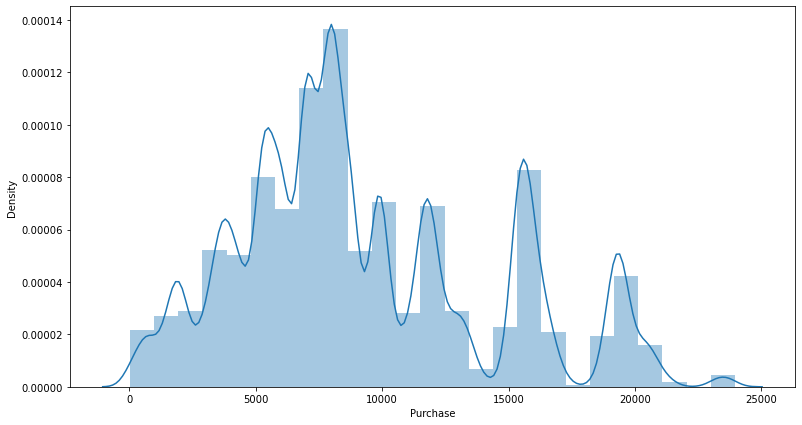

In [21]:
plt.figure(figsize=(13, 7))
sns.distplot(cdf['Purchase'], bins=25)

ValueError: cannot reindex from a duplicate axis

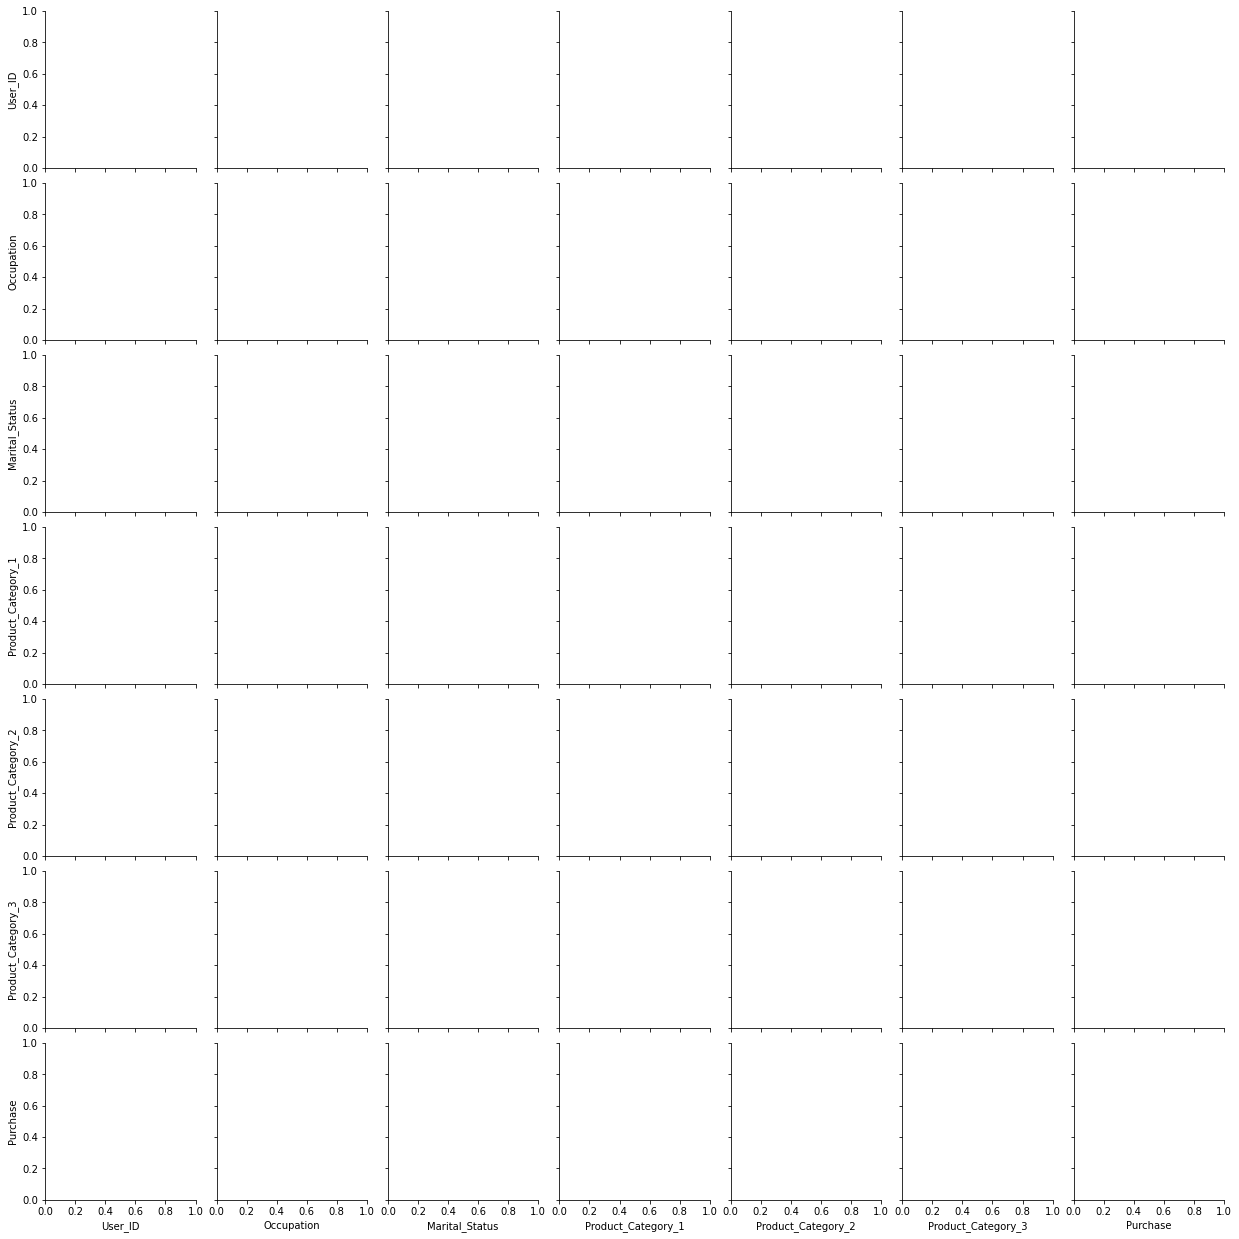

In [22]:
#cdf = cdf[~cdf.index.duplicated()]
#cdf[cdf.index.duplicated()]
#sns.pairplot(cdf)

In [23]:
cdf.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
source                             0
dtype: int64

In [24]:
cdf['Product_Category_1'].value_counts()

5     215950
1     200699
8     162294
11     34440
2      34056
6      29326
3      28791
4      16756
16     13933
15      8984
13      7930
10      7373
12      5610
7       5345
18      4436
20      2550
14      2186
19      1603
17       801
9        604
Name: Product_Category_1, dtype: int64

In [25]:
cdf['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [26]:
cdf.groupby(['Product_Category_1','Product_Category_2']).count()

User_ID  Product_ID  Gender    Age  \
Product_Category_1 Product_Category_2                                       
1                  2.0                   70498       70498   70498  70498   
                   3.0                     182         182     182    182   
                   4.0                     964         964     964    964   
                   5.0                   15974       15974   15974  15974   
                   6.0                   15237       15237   15237  15237   
...                                        ...         ...     ...    ...   
14                 16.0                    441         441     441    441   
                   17.0                     95          95      95     95   
                   18.0                     47          47      47     47   
15                 16.0                   3902        3902    3902   3902   
                   17.0                   1072        1072    1072   1072   

                                       Occupation  City_Category  \
Product_Category_1 Product_Category_2                              
1                  2.0                      70498          70498   
                   3.0                        182            182   
                   4.0                        964            964   
                   5.0                      15974          15974   
                   6.0                      15237          15237   
...                                           ...            ...   
14                 16.0                       441            441   
                   17.0                        95             95   
                   18.0                        47             47   
15                 16.0                      3902           3902   
                   17.0                      1072           1072   

                                       Stay_In_Current_City_Years  \
Product_Category_1 Product_Category_2                               
1                  2.0                                      70498   
                   3.0                                        182   
                   4.0                                        964   
                   5.0                                      15974   
                   6.0                                      15237   
...                                                           ...   
14                 16.0                                       441   
                   17.0                                        95   
                   18.0                                        47   
15                 16.0                                      3902   
                   17.0                                      1072   

                                       Marital_Status  Product_Category_3  \
Product_Category_1 Product_Category_2                                       
1                  2.0                          70498               62347   
                   3.0                            182                 182   
                   4.0                            964                 736   
                   5.0                          15974               12717   
                   6.0                          15237               12980   
...                                               ...                 ...   
14                 16.0                           441                   0   
                   17.0                            95                   0   
                   18.0                            47                   0   
15                 16.0                          3902                 217   
                   17.0                          1072                   0   

                                       Purchase  source  
Product_Category_1 Product_Category_2                    
1                  2.0                    49217   70498  
                   3.0                      119     182  
                   4

In [27]:
cdf.groupby(['Product_Category_1'])['Product_Category_2'].mean()

Product_Category_1
1      7.740964
2      6.659880
3      4.482397
4      6.005866
5     10.952786
6     10.046307
7     12.504673
8     14.651326
9     15.000000
10    14.364661
11    15.116092
12    14.333441
13    15.626527
14    16.324185
15    16.215521
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
Name: Product_Category_2, dtype: float64

In [28]:
cdf.groupby(['Product_Category_1','Product_Category_3']).count()

User_ID  Product_ID  Gender    Age  \
Product_Category_1 Product_Category_3                                       
1                  3.0                     878         878     878    878   
                   4.0                     930         930     930    930   
                   5.0                   11496       11496   11496  11496   
                   6.0                    6888        6888    6888   6888   
                   8.0                   11421       11421   11421  11421   
                   9.0                    7980        7980    7980   7980   
                   11.0                   2277        2277    2277   2277   
                   12.0                   1505        1505    1505   1505   
                   13.0                   2995        2995    2995   2995   
                   14.0                   9329        9329    9329   9329   
                   15.0                  31072       31072   31072  31072   
                   16.0                  26522       26522   26522  26522   
                   17.0                  13332       13332   13332  13332   
                   18.0                   3653        3653    3653   3653   
2                  4.0                    1761        1761    1761   1761   
                   5.0                    2864        2864    2864   2864   
                   8.0                    3461        3461    3461   3461   
                   9.0                    3854        3854    3854   3854   
                   10.0                   1408        1408    1408   1408   
                   12.0                    606         606     606    606   
                   14.0                   2328        2328    2328   2328   
                   15.0                   4908        4908    4908   4908   
                   16.0                    807         807     807    807   
                   18.0                   1152        1152    1152   1152   
3                  5.0                    9439        9439    9439   9439   
                   8.0                     237         237     237    237   
                   9.0                     761         761     761    761   
                   12.0                   6723        6723    6723   6723   
                   16.0                    544         544     544    544   
4                  8.0                    1508        1508    1508   1508   
                   9.0                    3025        3025    3025   3025   
                   12.0                   1692        1692    1692   1692   
                   13.0                    157         157     157    157   
                   15.0                    972         972     972    972   
                   18.0                    267         267     267    267   
5                  8.0                    1234        1234    1234   1234   
                   9.0                     912         912     912    912   
                   11.0                    308         308     308    308   
                   12.0                   2589        2589    2589   2589   
                   13.0                    873         873     873    873   
                   14.0                  12305       12305   12305  12305   
                   15.0                    374         374     374    374   
                   16.0                   3740        3740    3740   3740   
                   17.0                   3198        3198    3198   3198   
                   18.0                   1525        1525    1525   1525   
6                  10.0                   1093        1093    1093   1093   
                   13.0                   3824        3824    3824   3824   
                   14.0                   1539        1539    1539   1539   
                   15.0                   1235        1235    1235   1235   
                   16.0                   4272        4272    4272   4272   
8                  14.0            

In [29]:
prod_cat1_2= cdf[['Product_Category_1', 'Product_Category_3']]
prod_cat1_2.groupby(['Product_Category_1','Product_Category_3'])

In [30]:
prod_cat1_2.groupby(['Product_Category_1'])['Product_Category_3'].mean()

Product_Category_1
1     12.771366
2     10.581451
3      8.208315
4     10.631151
5     14.170338
6     14.132325
7           NaN
8     16.304804
9           NaN
10    16.000000
11    16.000000
12    17.000000
13    16.000000
14          NaN
15    17.000000
16          NaN
17          NaN
18          NaN
19          NaN
20          NaN
Name: Product_Category_3, dtype: float64

In [31]:
prod_cat1_2.loc[prod_cat1_2['Product_Category_1']==1].count()

Product_Category_1    200699
Product_Category_3    130278
dtype: int64

<AxesSubplot:>

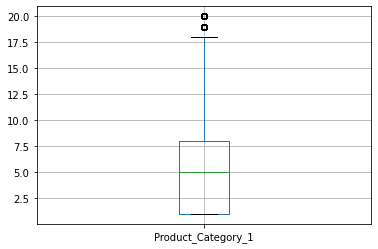

In [32]:
cdf.boxplot(column = 'Product_Category_1')

In [33]:

# prod categroy 2 na is filled with product cateory 1 groups
cdf['Product_Category_2'] = cdf.groupby('Product_Category_1').Product_Category_2.transform(lambda x: x.fillna(x.mean()))

In [34]:
# remaining null values are filled with mean values
cdf['Product_Category_2'].fillna(cdf['Product_Category_2'].mean(),inplace=True)

In [35]:
# cat3 is filled with mean values.
cdf['Product_Category_3'].fillna(cdf['Product_Category_3'].mean(),inplace=True)

In [ ]:
cdf.info()
#train = cdf.loc[cdf['source']=='trainData']

In [36]:
#Encode of categorial columns

cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    cdf[col] = le.fit_transform(cdf[col])
cdf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,0,0,10,0,2,0,3,4.482397,12.668605,8370.0,trainData
1,1000001,P00248942,0,0,10,0,2,0,1,6.000000,14.000000,15200.0,trainData
2,1000001,P00087842,0,0,10,0,2,0,12,14.333441,12.668605,1422.0,trainData
3,1000001,P00085442,0,0,10,0,2,0,12,14.000000,12.668605,1057.0,trainData
4,1000002,P00285442,1,6,16,2,4,0,8,14.651326,12.668605,7969.0,trainData


<AxesSubplot:>

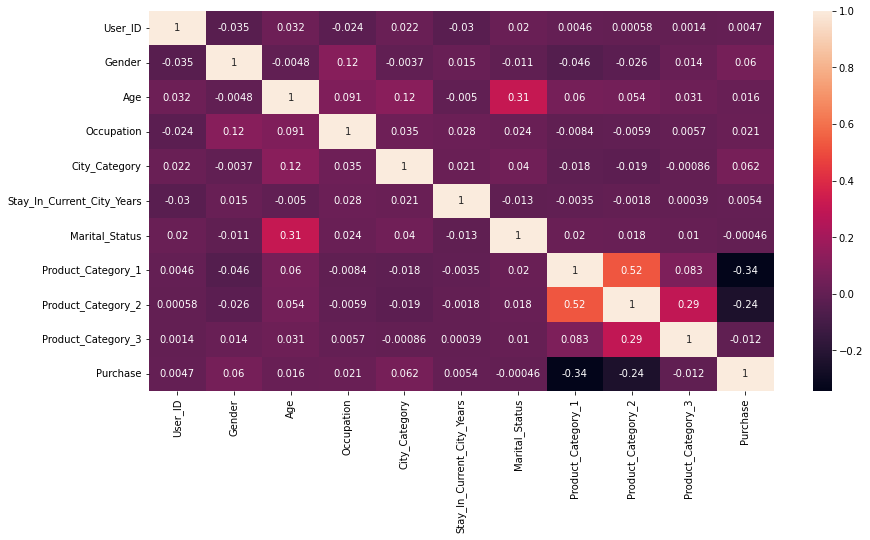

In [37]:
corr = cdf.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True)

In [38]:
# split train and test
train = cdf.loc[cdf['source']=='trainData']
test = cdf.loc[cdf['source']=='testData']

In [ ]:
cdf.info()

<AxesSubplot:>

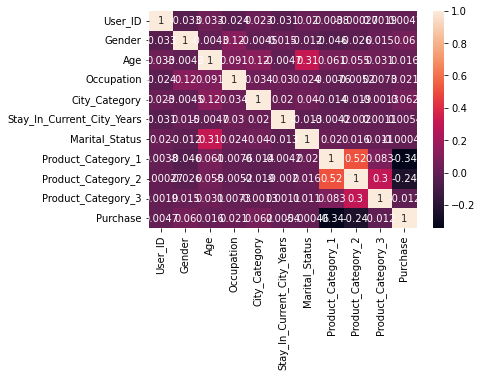

In [39]:
corr_ = train.corr()
sns.heatmap(corr_,annot = True)

In [40]:
X = train.select_dtypes(include=np.number).drop(columns = 'Purchase')

In [41]:
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data

,features
0,User_ID
1,Gender
2,Age
3,Occupation
4,City_Category
5,Stay_In_Current_City_Years
6,Marital_Status
7,Product_Category_1
8,Product_Category_2
9,Product_Category_3


In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [43]:
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [44]:
vif_data

,features,VIF
0,User_ID,42.710197
1,Gender,4.117911
2,Age,5.003065
3,Occupation,2.594534
4,City_Category,2.930803
5,Stay_In_Current_City_Years,3.081790
6,Marital_Status,1.876784
7,Product_Category_1,3.966996
8,Product_Category_2,9.687847
9,Product_Category_3,35.437058


In [ ]:
#cdf.drop(columns = ['User_ID'],inplace = True)

In [45]:
cdf.drop(columns = ['Product_Category_3'],inplace = True)

In [46]:
train = cdf.loc[cdf['source']=='trainData']
test = cdf.loc[cdf['source']=='testData']


train.drop(columns = ['source'],inplace = True)
test.drop(columns = ['source'],inplace = True)


X = train.select_dtypes(include=np.number).drop(columns = 'Purchase')
vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF
0,User_ID,17.001065
1,Gender,4.116235
2,Age,5.001672
3,Occupation,2.594474
4,City_Category,2.930796
5,Stay_In_Current_City_Years,3.081783
6,Marital_Status,1.876779
7,Product_Category_1,3.938757
8,Product_Category_2,8.843795


# Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [ ]:
test.head()

In [47]:
X_train = train.drop(columns = ['User_ID','Product_ID','Purchase'])
X_test = test.drop(columns = ['User_ID','Product_ID','Purchase'])
train_y = train['Purchase']
test_y = test['Purchase']

In [50]:
lr = LinearRegression()
lr.fit(X_train,train_y)
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)
pred_test = abs(pred_test)
print("MAE: ",mean_absolute_error(train_y,pred_train))
print("MSE: ",mean_squared_error(train_y,pred_train))
print("RMSE: ",np.sqrt(mean_squared_error(train_y,pred_train)))
print("R-Squared: ",r2_score(train_y,pred_train))

MAE:  3590.4413703431464
MSE:  21947980.010341678
RMSE:  4684.867128355048
R-Squared:  0.13012333412020416


In [52]:
submission = pd.read_csv("sample_submission_V9Inaty.csv")

In [53]:
submission['Purchase'] = pred_test

Purchase      233599
User_ID       233599
Product_ID    233599
dtype: int64